## Obteniendo los datos

In [471]:
import pandas as pd
# Primero se creará un txt con el cuerpo de todas las noticias

df = pd.read_csv('./Data/Noticias.csv', nrows = 1000)
data = df['cuerpo'].tolist()

print(df.shape[0])


1000


In [13]:
# Encontrando las stopwords en español usando nltk (Funciones para procesar/limpiar los datos)
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
new_stopwords = ["si", "dos", "así", "tras"]

spanish_stopwords.extend(new_stopwords)
print(spanish_stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sanders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Funciones para la limpieza de datos
import re

# Funcion para eliminar caracteres que no sean alfanuméricos, ejm: ?, . , " , [ , etc.
def clean_word(word):
    return re.sub(r'[^\w\s]','',word).lower() 

# Funcion para verficar las stopwords
def word_not_in_stopwords(word):
    return word not in spanish_stopwords and word and word.isalpha()

In [456]:
from collections import Counter

def normal_method(data):
    cnt = Counter()
    for text in data:
        tokens_in_text = text.split()
        tokens_in_text = map(clean_word, tokens_in_text)
        tokens_in_text = filter(word_not_in_stopwords, tokens_in_text)
        cnt.update(tokens_in_text)
        
    return cnt.most_common(50)

In [472]:

%time normal_method(data)


CPU times: user 1.83 s, sys: 24.8 ms, total: 1.85 s
Wall time: 1.85 s


[('personas', 2446),
 ('horas', 1918),
 ('gobierno', 1722),
 ('comunidad', 1665),
 ('madrid', 1646),
 ('queda', 1481),
 ('toque', 1411),
 ('españa', 1340),
 ('hostelería', 1291),
 ('discapacidad', 1279),
 ('ser', 1119),
 ('según', 1095),
 ('aunque', 1085),
 ('años', 1084),
 ('limitación', 962),
 ('además', 947),
 ('trabajo', 942),
 ('caso', 921),
 ('seis', 903),
 ('virus', 900),
 ('iglesias', 898),
 ('interior', 883),
 ('reuniones', 875),
 ('frente', 860),
 ('presidente', 827),
 ('vacuna', 823),
 ('momento', 811),
 ('máximo', 807),
 ('vox', 803),
 ('movilidad', 792),
 ('podemos', 788),
 ('nacional', 764),
 ('solo', 755),
 ('tres', 750),
 ('parte', 740),
 ('pp', 738),
 ('sociales', 737),
 ('partido', 732),
 ('cierre', 727),
 ('medidas', 726),
 ('pandemia', 725),
 ('año', 715),
 ('aforo', 688),
 ('país', 674),
 ('coronavirus', 662),
 ('vacunas', 660),
 ('cinco', 636),
 ('crisis', 611),
 ('perimetral', 605),
 ('vacunación', 594)]

# Usando el método de MapReduce

In [470]:
from multiprocessing import Pool
from functools import reduce
pool = Pool()

def mapper(text):
    tokens_in_text = text.split()
    tokens_in_text = map(clean_word, tokens_in_text)
    tokens_in_text = filter(word_not_in_stopwords, tokens_in_text)
    return Counter(tokens_in_text)

def reducer(cnt1, cnt2):
    cnt1.update(cnt2)
    return cnt1

def chunk_mapper(chunk):
    mapped = map(mapper, chunk)
    reduced = reduce(reducer, mapped)
    return reduced


def chunkify(text, number_of_chunks):
    if number_of_chunks >= len(text):
        return [text]
    chunk_size = len(text) // number_of_chunks  
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

Process ForkPoolWorker-463:
Process ForkPoolWorker-465:
Process ForkPoolWorker-460:
Process ForkPoolWorker-462:
Process ForkPoolWorker-461:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-464:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 

In [326]:
import os

num_cpus = os.cpu_count()
print(num_cpus)

6


In [445]:
def mapReduce_method(data):
    data_chunks = chunkify(data, number_of_chunks = 36)
    
    mapped = pool.map(chunk_mapper, data_chunks)
    
    reduced = reduce(reducer, mapped)

    return reduced.most_common(50)

In [473]:
%time mapReduce_method(data)

CPU times: user 116 ms, sys: 8.29 ms, total: 125 ms
Wall time: 476 ms


[('personas', 2446),
 ('horas', 1918),
 ('gobierno', 1722),
 ('comunidad', 1665),
 ('madrid', 1646),
 ('queda', 1481),
 ('toque', 1411),
 ('españa', 1340),
 ('hostelería', 1291),
 ('discapacidad', 1279),
 ('ser', 1119),
 ('según', 1095),
 ('aunque', 1085),
 ('años', 1084),
 ('limitación', 962),
 ('además', 947),
 ('trabajo', 942),
 ('caso', 921),
 ('seis', 903),
 ('virus', 900),
 ('iglesias', 898),
 ('interior', 883),
 ('reuniones', 875),
 ('frente', 860),
 ('presidente', 827),
 ('vacuna', 823),
 ('momento', 811),
 ('máximo', 807),
 ('vox', 803),
 ('movilidad', 792),
 ('podemos', 788),
 ('nacional', 764),
 ('solo', 755),
 ('tres', 750),
 ('parte', 740),
 ('pp', 738),
 ('sociales', 737),
 ('partido', 732),
 ('cierre', 727),
 ('medidas', 726),
 ('pandemia', 725),
 ('año', 715),
 ('aforo', 688),
 ('país', 674),
 ('coronavirus', 662),
 ('vacunas', 660),
 ('cinco', 636),
 ('crisis', 611),
 ('perimetral', 605),
 ('vacunación', 594)]

# Construyendo gráficos

In [175]:
# Funciones para calcular los tiempos con variacion en la cantidad de nrows
from time import time

def time_calculator(nrows_list, function_to_analyse):
    result = {}
    
    for nrows in nrows_list:
        # Leer el archivo CSV con el número especificado de filas
        df = pd.read_csv('./Data/Noticias.csv', nrows=nrows)
        data = df['cuerpo'].tolist()
        
        # Calcular el tiempo de ejecución de find_top_words
        start = time()
        function_to_analyse(data)
        end = time()
        
        execution_time = end - start
        execution_time = round(execution_time, 3)

        result[nrows] = execution_time
        
        print(f"Tiempo de ejecución para nrows={nrows}: {execution_time} segundos")
    
    return result

## Método Normal

In [14]:
# Definir una lista de valores de nrows que deseas probar
nrows_list = list(range(500, 40001, 500))

# Calcular los tiempos de ejecución para cada valor de nrows
#normal_method_times = time_calculator(nrows_list, normal_method)
print("\n----\n")
#mapReduce_times = time_calculator(nrows_list, mapReduce_method)


----



In [15]:
import matplotlib.pyplot as plt

"""
df_normal_method = pd.DataFrame(list(normal_method_times.items()), columns=['nrows', 'tiempo_ejecucion'])
df_mapReduce_method = pd.DataFrame(list(mapReduce_times.items()), columns=['nrows', 'tiempo_ejecucion'])

# Imprimir el DataFrame
plt.plot(df_normal_method['nrows'], df_normal_method['tiempo_ejecucion'], label='Método Normal')
plt.plot(df_mapReduce_method['nrows'], df_mapReduce_method['tiempo_ejecucion'], label='Método MapReduce')

# Agregar etiquetas y título al gráfico
plt.xlabel('Número de filas')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos de ejecución entre métodos')

# Agregar una leyenda
plt.legend()

#Guardar imagen
plt.savefig('graph.jpg')

# Mostrar el gráfico
plt.show()


"""


"\ndf_normal_method = pd.DataFrame(list(normal_method_times.items()), columns=['nrows', 'tiempo_ejecucion'])\ndf_mapReduce_method = pd.DataFrame(list(mapReduce_times.items()), columns=['nrows', 'tiempo_ejecucion'])\n\n# Imprimir el DataFrame\nplt.plot(df_normal_method['nrows'], df_normal_method['tiempo_ejecucion'], label='Método Normal')\nplt.plot(df_mapReduce_method['nrows'], df_mapReduce_method['tiempo_ejecucion'], label='Método MapReduce')\n\n# Agregar etiquetas y título al gráfico\nplt.xlabel('Número de filas')\nplt.ylabel('Tiempo de ejecución (segundos)')\nplt.title('Comparación de tiempos de ejecución entre métodos')\n\n# Agregar una leyenda\nplt.legend()\n\n#Guardar imagen\nplt.savefig('Comparacion.jpg')\n\n# Mostrar el gráfico\nplt.show()\n\n\n"

# Análisis de palabras

In [16]:
def word_calculator(nrows_list, function_to_analyse):
    result = {}
    counter = 1
    
    for nrows in nrows_list:
        # Leer el archivo CSV con el número especificado de filas
        df = pd.read_csv('./Data/Noticias.csv', nrows=nrows)
        data = df['cuerpo'].tolist()

        result[counter] = function_to_analyse(data)
        counter = counter + 1
        
    return result

In [41]:
nrows_list = list(range(500, 40001, 500))
mapReduce_words = word_calculator(nrows_list, mapReduce_method)
print(mapReduce_words)

{1: [('personas', 1188), ('horas', 961), ('madrid', 924), ('comunidad', 845), ('gobierno', 763), ('queda', 738), ('toque', 703), ('españa', 651), ('hostelería', 636), ('discapacidad', 634), ('aunque', 552), ('según', 547), ('ser', 539), ('años', 531), ('iglesias', 506), ('además', 482), ('limitación', 473), ('frente', 468), ('interior', 463), ('seis', 460), ('trabajo', 456), ('caso', 438), ('virus', 438), ('vox', 435), ('reuniones', 428), ('partido', 407), ('vacuna', 407), ('máximo', 401), ('momento', 394), ('movilidad', 388), ('solo', 385), ('presidente', 383), ('podemos', 381), ('nacional', 363), ('tres', 360), ('cierre', 356), ('parte', 354), ('pandemia', 345), ('medidas', 345), ('aforo', 343), ('sociales', 336), ('vacunas', 332), ('año', 331), ('país', 327), ('hecho', 326), ('cinco', 320), ('coronavirus', 312), ('seguridad', 311), ('pp', 309), ('crisis', 303)], 2: [('personas', 2446), ('horas', 1918), ('gobierno', 1722), ('comunidad', 1665), ('madrid', 1646), ('queda', 1481), ('toq

In [38]:
from wordcloud import WordCloud

def generate_graphics(dictionary):
    for _clave, _value in dictionary.items():
        plt.figure(figsize=(10, 6))
        _value = dict(_value)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(_value)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de Palabras - Clave {_clave}')
        plt.tight_layout()
        plt.savefig(f'./IMG/{_clave}.png', bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()


In [42]:
generate_graphics(mapReduce_words)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from natsort import natsorted
import os


def animate_images(image_folder, output_file='animation.gif'):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    images = natsorted(images) 

    fig = plt.figure(figsize=(8, 6))
    plt.axis('off')

    ims = []
    for img_name in images:
        img_path = os.path.join(image_folder, img_name)
        img = plt.imread(img_path)
        im = plt.imshow(img, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True)
    ani.save(output_file, writer='pillow')


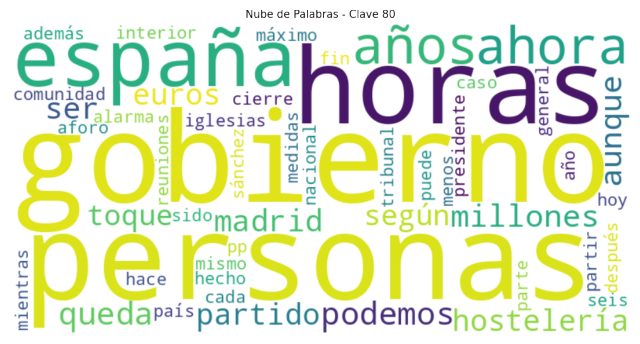

In [2]:
image_folder = './IMG'
output_file = 'animation.gif'

animate_images(image_folder, output_file)